In [1]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB 1.3 MB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.5 MB 1.6 MB/s eta 0:00:01
     ----- ---------------------------------- 0.2/1.5 MB 1.6 MB/s eta 0:00:01
     ------ --------------------------------- 0.3/1.5 MB 1.6 MB/s eta 0:00:01
     -------- ------------------------------- 0.3/1.5 MB 1.4 MB/s eta 0:00:01
     ----------- ---------------------------- 0.4/1.5 MB 1.7 MB/s eta 0:00:01
     --------------- ------------------------ 0.6/1.5 MB 1.9 MB/s eta 0:00:01
     --------------------- ------------------ 0.8/1.5 MB 2.2 MB/s eta 0:00:01
     ------------------------- -------------- 1.0/1.5 MB 2.5 MB/s eta 0:00:01
     ------------------------- -------------- 1.0/1.5 MB 2.5 MB/s eta 0:00:01
     ----------------------------- ---------- 1.1/1.5 MB 2.2 MB/s eta 0:00:01
     -------------------------------- ------- 1.2/1.5 MB 2.2 MB/s eta 0

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [58 lines of output]
  Traceback (most recent call last):
    File "C:\Users\Bala\AppData\Local\Temp\pip-build-env-c2jklphd\overlay\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Bala\AppData\Local\Temp\pip-build-env-c2jklphd\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Bala\AppData\Local\Temp\pip-build-env-c2jklphd\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
       

import os
import json
from PIL import Image

# Define the input and output folders
input_folder = "data/val/images/"
output_folder = "data/val/new_images/"
json_folder = "data/val/labels/"

new_width = 650
new_height = 450

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Loop through all image files in the input folder
for image_filename in os.listdir(input_folder):
    if image_filename.endswith(".jpg"):  # Adjust the file extension if needed
        # Build the full path for the image and corresponding JSON file
        image_path = os.path.join(input_folder, image_filename)
        json_filename = os.path.splitext(image_filename)[0]
        # json_path = os.path.join(input_folder, json_filename)
        json_path = os.path.join(json_folder, json_filename + ".json")
        print(json_path)

        # Open and resize the image
        image = Image.open(image_path)
        resized_image = image.resize((new_width, new_height), Image.LANCZOS)

        # Save the resized image to the output folder
        output_path = os.path.join(output_folder, image_filename)
        resized_image.save(output_path)

        # # Load and update the corresponding JSON file
        # with open(json_path, "r") as json_file:
        #     json_data = json.load(json_file)
            

        # # Update the JSON data with the new dimensions
        # json_data["imageWidth"] = new_width
        # json_data["imageHeight"] = new_height

        # # Save the updated JSON data back to the same file
        # with open(json_path, "w") as json_file:
        #     json.dump(json_data, json_file, indent=4)

In [2]:
import os
import time
import uuid
import cv2

In [3]:
IMAGES_PATH = os.path.join('data','images')

In [4]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
images = tf.data.Dataset.list_files('data\\train\\images\\*.jpg')

In [6]:
images

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [7]:
images.as_numpy_iterator().next()

b'data\\train\\images\\33.jpg'

In [8]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [9]:
images = images.map(load_image)

In [10]:
images

<_MapDataset element_spec=TensorSpec(shape=(None, None, None), dtype=tf.uint8, name=None)>

In [11]:
images.as_numpy_iterator().next()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [251, 251, 251],
        [248, 248, 248],
        [248, 248, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 250, 250],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [249, 249, 249],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 39,  48,  55],
        [ 39,  48,  55],
        [ 39,  48,  55],
        ...,
        [ 39,  48,  55],
        [ 39,  48,  55],
        [ 39,  48,  55]],

       [[ 39,  48,  55],
        [ 39,  48,  55],
        [ 39,  48,  55],
        ...,
        [ 39,  48,  55],
        [ 39,  48,  55],
        [ 39,  48,  55]],

       [[ 39,  48,  55],
        [ 39,  48,  55],
        [ 39,  48,  55],
        ...,
        [ 39,  48,  55],
        [ 39,  48,  55],
        [ 39,  48,  55]]

In [12]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [68]:
image_generator = images.batch(4).as_numpy_iterator()

In [69]:
plot_images = image_generator.next()

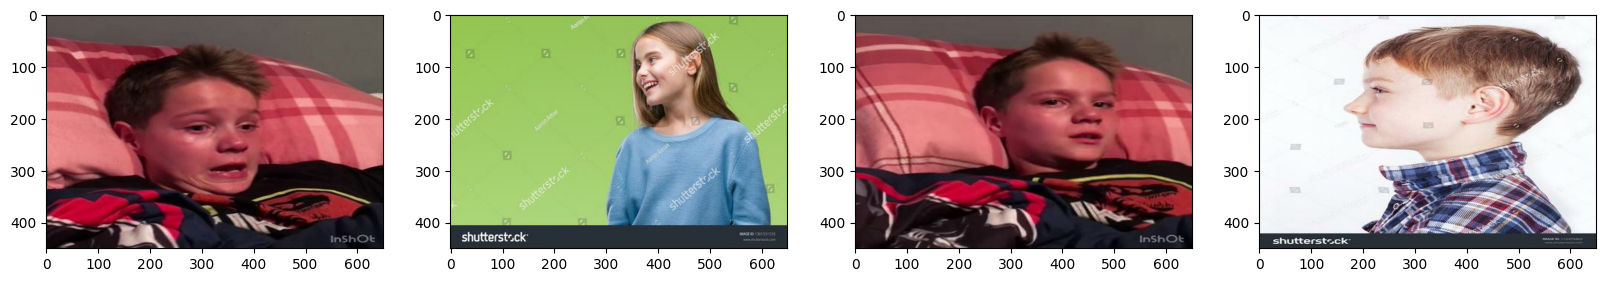

In [70]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

## MOVING MATCHING LABELS

In [18]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [19]:
# !pip install albumentations

In [106]:
import albumentations as alb

In [107]:
augmentor = alb.Compose([ alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [123]:
img = cv2.imread(os.path.join('data','train', 'images','f265.jpg'))

In [124]:
with open(os.path.join('data', 'train', 'labels', 'f265.json'), 'r') as f:
    label = json.load(f)

In [125]:
label['shapes'][0]['points']

[[217.40837696335078, 35.4712041884817],
 [522.6439790575915, 305.1047120418848]]

In [126]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [127]:
coords

[217.40837696335078, 35.4712041884817, 522.6439790575915, 305.1047120418848]

In [128]:
coords = list(np.divide(coords, [640,450,640,480]))

In [129]:
coords

[0.3397005890052356, 0.078824898196626, 0.8166312172774868, 0.6356348167539266]

# AUGMENTING

In [134]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [135]:
augmented['bboxes'][0][2:]

(0.6602994109947644, 0.6356348167539266)

In [136]:
augmented['bboxes']

[(0.18336878272251322,
  0.078824898196626,
  0.6602994109947644,
  0.6356348167539266)]

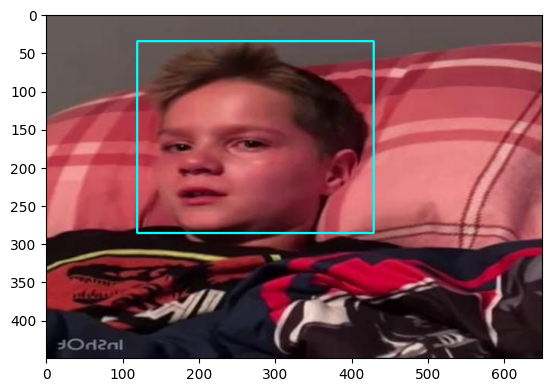

In [137]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [650, 450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [650, 450]).astype(int)),
              (255, 255, 0), 2)

# Display the image in its original RGB format
plt.imshow(cv2.cvtColor(augmented['image'], cv2.COLOR_BGR2RGB))
plt.show()

# RUN AUGMENTATION

In [34]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(80):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

image must be numpy array type
Expected x_max for bbox [0.2938890706806282, 0.09135034904013967, 1.0137843586387434, 0.8668739092495638, 'face'] to be in the range [0.0, 1.0], got 1.0137843586387434.
image must be numpy array type
Requested crop size (450, 450) is larger than the image size (183, 275)
Requested crop size (450, 450) is larger than the image size (183, 275)
image must be numpy array type
Expected x_max for bbox [0.3781495418848167, 0.11098385689354281, 1.0015134162303663, 0.7032613438045375, 'face'] to be in the range [0.0, 1.0], got 1.0015134162303663.


## Load Augmented Images to Tensorflow Dataset

In [144]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [145]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [146]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [115]:
train_images

<_MapDataset element_spec=TensorSpec(shape=(120, 120, None), dtype=tf.float32, name=None)>

In [144]:
val_images.as_numpy_iterator().next()

array([[[0.29908088, 0.1853554 , 0.16966912],
        [0.31047794, 0.21997549, 0.19705883],
        [0.27726716, 0.2096201 , 0.18265931],
        ...,
        [0.84362745, 0.85539216, 0.82009804],
        [0.8541054 , 0.86243874, 0.82028186],
        [0.84914213, 0.8545343 , 0.81875   ]],

       [[0.38216913, 0.24491422, 0.22922795],
        [0.34007353, 0.22598039, 0.2098652 ],
        [0.3469363 , 0.265625  , 0.23915441],
        ...,
        [0.8632353 , 0.875     , 0.8397059 ],
        [0.85882354, 0.86715686, 0.825     ],
        [0.85490197, 0.8602941 , 0.8245098 ]],

       [[0.5106618 , 0.35085785, 0.33468136],
        [0.42395833, 0.28866422, 0.2720588 ],
        [0.40202206, 0.29613972, 0.26911765],
        ...,
        [0.87101716, 0.88278186, 0.84748775],
        [0.8627451 , 0.87107843, 0.82892156],
        [0.85851717, 0.8639093 , 0.828125  ]],

       ...,

       [[0.8181372 , 0.8102941 , 0.7593137 ],
        [0.8043505 , 0.795527  , 0.7450368 ],
        [0.8       , 0

## Prepare Labels

In [148]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [149]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [150]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [151]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [143]:
val_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3188, 0.4768, 0.8364, 0.999 ], dtype=float16))

# Combine Label and Image Samples

In [122]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(5520, 5520, 1200, 1200, 1280, 1280)

In [152]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [153]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [154]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [126]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.3115 , 0.4768 , 0.712  , 0.9653 ],
        [0.1929 , 0.1066 , 0.6963 , 0.3936 ],
        [0.     , 0.2386 , 0.6367 , 0.7764 ],
        [0.363  , 0.00409, 0.822  , 0.6206 ],
        [0.1952 , 0.01173, 0.591  , 0.518  ],
        [0.6216 , 0.00409, 1.     , 0.657  ],
        [0.01081, 0.0499 , 1.     , 0.5933 ],
        [0.408  , 0.3633 , 0.921  , 0.9927 ]], dtype=float16))

In [127]:
data_samples = train.as_numpy_iterator()

In [128]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


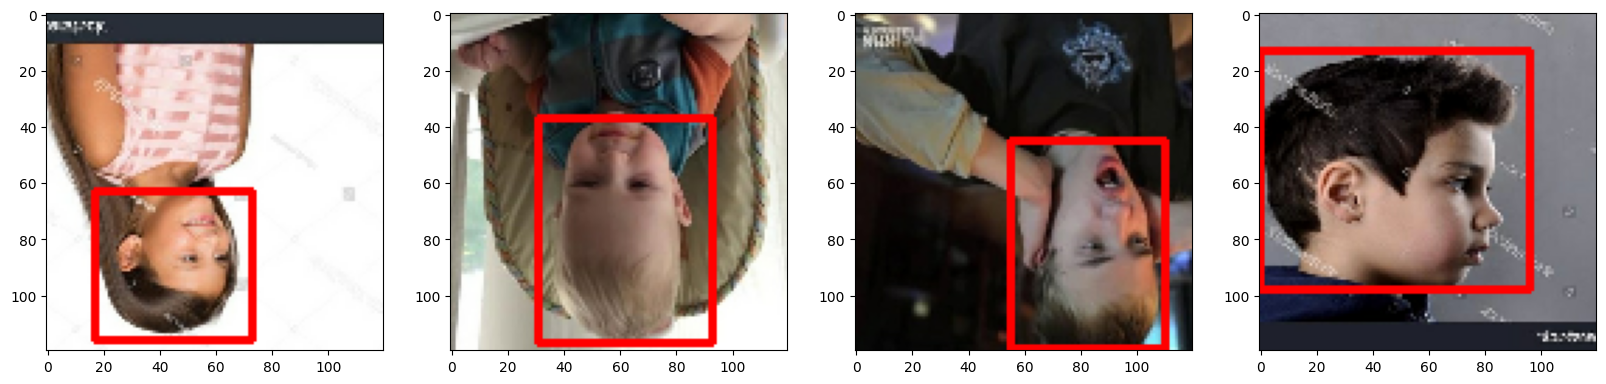

In [129]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# Build Deep Learning

In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [54]:
vgg = VGG16(include_top=False)

In [55]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

## INSTANCE of THE NETWORK

In [56]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [57]:
facetracker = build_model()

In [58]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [130]:
X, y = train.as_numpy_iterator().next()

In [131]:
X.shape


(8, 120, 120, 3)

In [132]:
classes, coords = facetracker.predict(X)

NameError: name 'facetracker' is not defined

In [ ]:
classes, coords

In [63]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [64]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [65]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [66]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [67]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.629773>

In [68]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.54459625>

In [69]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.629773>

#  Train Neural Network

In [70]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [71]:
model = FaceTracker(facetracker)


In [72]:
model.compile(opt, classloss, regressloss)

In [73]:
logdir='logs'

In [74]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [75]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
800/800 [==============================] - 661s 818ms/step - total_loss: 0.2126 - class_loss: 0.0296 - regress_loss: 0.1978 - val_total_loss: 0.1511 - val_class_loss: 3.4751e-05 - val_regress_loss: 0.1510
Epoch 2/15
800/800 [==============================] - 660s 820ms/step - total_loss: 0.0160 - class_loss: 4.9308e-05 - regress_loss: 0.0160 - val_total_loss: 0.0738 - val_class_loss: 1.7047e-05 - val_regress_loss: 0.0738
Epoch 3/15
800/800 [==============================] - 657s 817ms/step - total_loss: 0.0080 - class_loss: 1.3225e-05 - regress_loss: 0.0080 - val_total_loss: 0.1818 - val_class_loss: 3.4655e-04 - val_regress_loss: 0.1816
Epoch 4/15
800/800 [==============================] - 664s 824ms/step - total_loss: 0.0063 - class_loss: 6.8069e-06 - regress_loss: 0.0063 - val_total_loss: 0.0436 - val_class_loss: 2.0266e-06 - val_regress_loss: 0.0436
Epoch 5/15
800/800 [==============================] - 743s 923ms/step - total_loss: 0.0064 - class_loss: 5.4116e-06 - regres

# PERFORMANCE

In [76]:
hist.history

{'total_loss': [0.03217591717839241,
  0.009736192412674427,
  0.007351981475949287,
  0.012408425100147724,
  0.014659960754215717,
  0.011912941932678223,
  0.003950148820877075,
  0.0015429991763085127,
  0.005682547576725483,
  0.001880866358987987,
  0.009747179225087166,
  0.0018575640860944986,
  0.001604691380634904,
  0.001641246723011136,
  0.0027556437999010086],
 'class_loss': [2.868484898499446e-06,
  1.4298380847321823e-05,
  9.387757700096699e-07,
  5.848765340488171e-06,
  1.2218966958243982e-06,
  9.685780923973653e-07,
  1.974414999494911e-06,
  2.0861644145497849e-07,
  4.999395059712697e-06,
  6.482011940533994e-07,
  8.940700269022273e-08,
  0.0,
  2.0116583243634523e-07,
  6.705523958316917e-08,
  0.0],
 'regress_loss': [0.0321744829416275,
  0.009729043580591679,
  0.007351512089371681,
  0.012405500747263432,
  0.01465934980660677,
  0.011912457644939423,
  0.003949161618947983,
  0.0015428948681801558,
  0.005680047906935215,
  0.0018805422587320209,
  0.009747

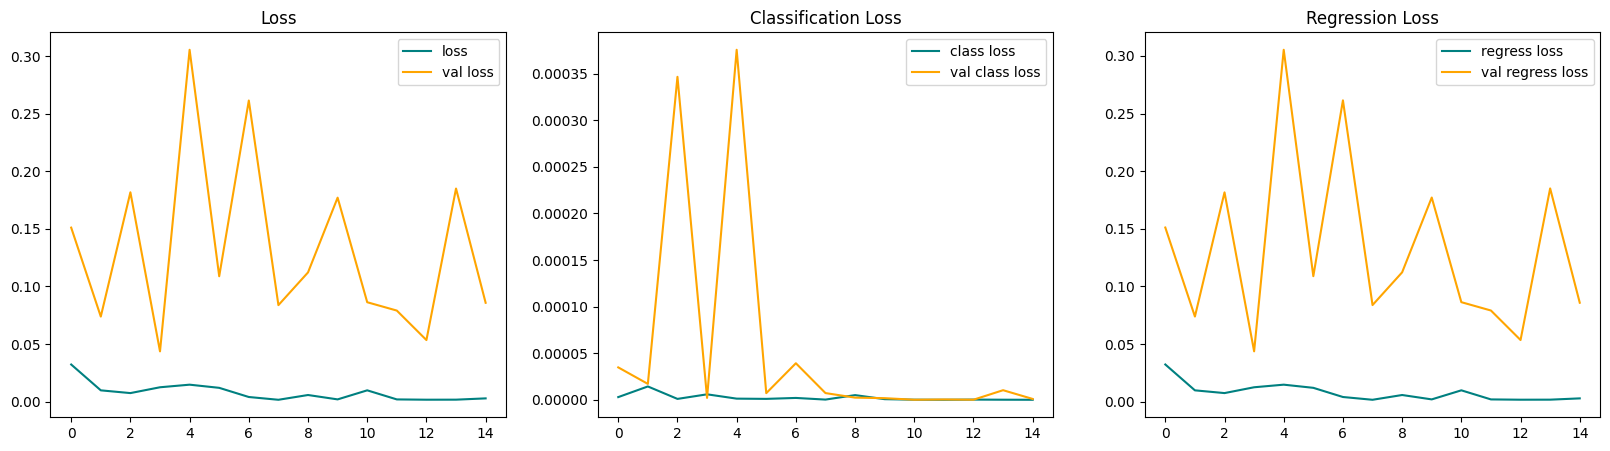

In [77]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# TEST DATA PREDICTIONS

In [155]:
from tensorflow.keras.models import load_model
facetracker = load_model('final h5 file/facetracker.h5')

In [156]:
test_data = test.as_numpy_iterator()

In [169]:
test_sample = test_data.next()

In [170]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 3s 3s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


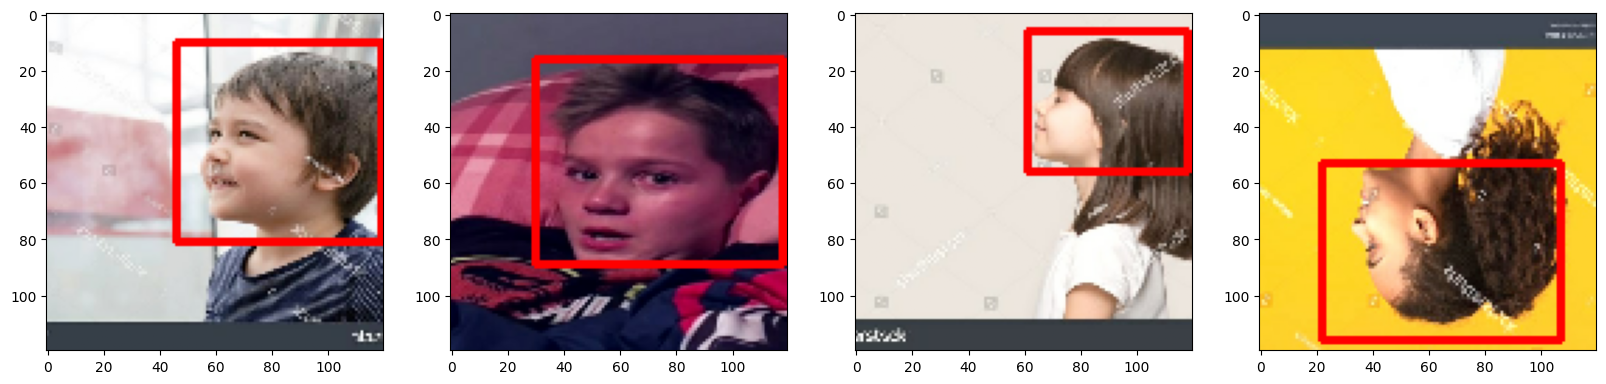

In [171]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [188]:
test_data

In [175]:
predicted_results=yhat[0]
predicted_results

array([[1.        ],
       [0.9999998 ],
       [0.99999994],
       [1.        ],
       [0.99997884],
       [0.9999542 ],
       [0.9999999 ],
       [0.99999595]], dtype=float32)

In [176]:
ground_truth_labels=test_sample[1][0]
ground_truth_labels

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

In [95]:
from tensorflow.keras.models import load_model

In [96]:
facetracker.save('facetracker.h5')

In [97]:
facetracker = load_model('facetracker.h5')

In [107]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [109]:
!pip install --upgrade opencv-python

In [110]:
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

cap = cv2.VideoCapture(1)

while cap.isOpened():
    _, frame = cap.read()
    frame = frame[50:500, 50:500, :]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120, 120))

    yhat = facetracker.predict(np.expand_dims(resized / 255, 0))
    sample_coords = yhat[1][0]

    if yhat[0] > 0.5:
        # Controls the main rectangle
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [450, 450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450, 450]).astype(int)),
                      (255, 0, 0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                                   [0, -30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                                   [80, 0])),
                      (255, 0, 0), -1)

        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                                                [0, -5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Display frame using Matplotlib
    plt.imshow(frame)
    plt.show(block=False)
    plt.pause(0.1)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
